<a href="https://colab.research.google.com/github/UmarKhattab09/Customer-Churn-Prediction/blob/main/CustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv("customer_churn_dataset-training-master.csv")
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [4]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [5]:
df['Churn'].value_counts()
#!pip install imblearn
##---> Can be an Imbalance Dataset.


,count
Churn,
1.0,249999
0.0,190833


In [6]:
df.isna().sum()

,0
CustomerID,1
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1


In [7]:
df[df['Age'].isna()] # ---> One Column doesn't have any value. We can drop it

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.dropna(inplace=True)

In [9]:
df[df['Age'].isna()] # ---> Dropped

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


<Axes: ylabel='Total Spend'>

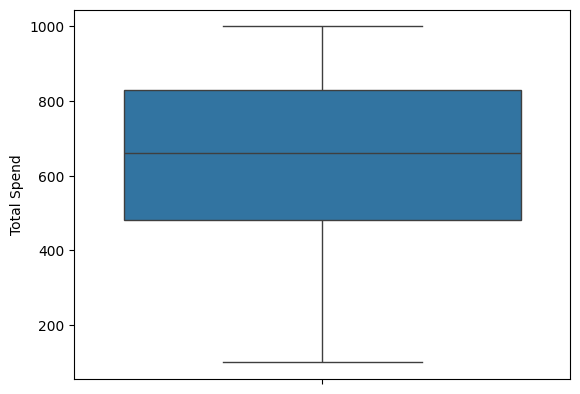

In [10]:
sns.boxplot(df['Total Spend'])

Numerical Features ['CustomerID', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn']
Categorical Features ['Gender', 'Subscription Type', 'Contract Length']


<Axes: >

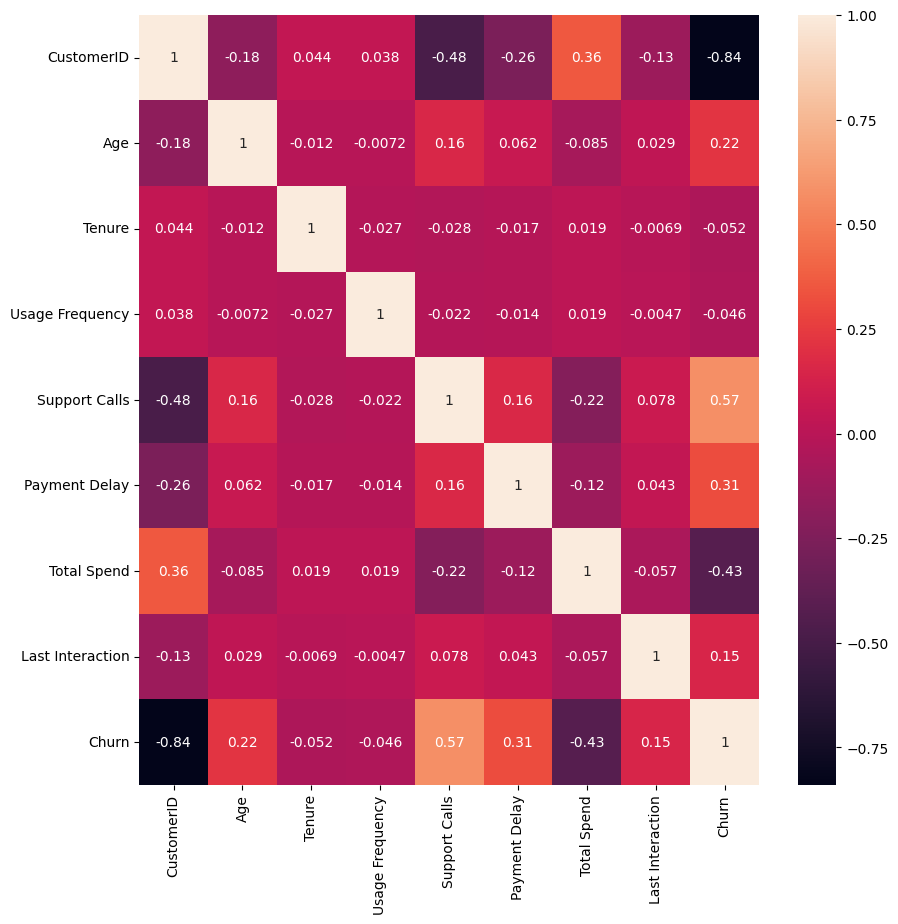

In [11]:
numeric_Features = [feature for feature in df.columns if df[feature].dtype != 'O']
CategoricalFeatures = [feature for feature in df.columns if df[feature].dtype == 'O']
print(f"Numerical Features {numeric_Features}")
print(f"Categorical Features {CategoricalFeatures}")
numericFeatureData = df.drop(df[['Gender','Subscription Type','Contract Length']],axis=1)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(numericFeatureData.corr(),annot=True)


In [12]:
df['Age'].unique()
bins = [0, 18, 30, 50, 100]
labels = ['Under 18', '18-29', '30-49', '50+']
df['AgeGroups'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)



In [13]:
### Gender ------> Label Encoding (Easier)
### Subscription Type ---- > Ordinal Encoding
### Contract Length -----> Ordinal Encoding ( Assigning Ranks)

In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labelencoder.fit_transform(df[['Gender']])
df['GenderModified'] = labelencoder.fit_transform(df[['Gender']])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
df["Subscription Type"].unique()

array(['Standard', 'Basic', 'Premium'], dtype=object)

In [16]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Basic','Standard','Premium']])
df['SubscriptionTypeModified'] = encoder.fit_transform(df[['Subscription Type']])
df[['Subscription Type','SubscriptionTypeModified']].head()

,Subscription Type,SubscriptionTypeModified
0,Standard,1.0
1,Basic,0.0
2,Basic,0.0
3,Standard,1.0
4,Basic,0.0


In [17]:
df['Contract Length'].unique()

array(['Annual', 'Monthly', 'Quarterly'], dtype=object)

In [18]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Monthly','Quarterly','Annual']])
df['ContractLengthModified'] = encoder.fit_transform(df[['Contract Length']])
df[['Contract Length','ContractLengthModified']].head()

,Contract Length,ContractLengthModified
0,Annual,2.0
1,Monthly,0.0
2,Quarterly,1.0
3,Monthly,0.0
4,Monthly,0.0


In [19]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,AgeGroups,GenderModified,SubscriptionTypeModified,ContractLengthModified
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0,30-49,0,1.0,2.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0,50+,0,0.0,0.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0,50+,0,0.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0,50+,1,1.0,0.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0,18-29,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0,30-49,1,2.0,2.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0,18-29,0,2.0,2.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0,18-29,1,1.0,1.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0,18-29,1,1.0,1.0


In [20]:
### ML models


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
Trainingdf = df.drop(['Subscription Type','Contract Length','Gender','CustomerID','AgeGroups'],axis=1)
X,y=smote.fit_resample(Trainingdf.drop(['Churn'],axis=1),Trainingdf['Churn'])
X

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,GenderModified,SubscriptionTypeModified,ContractLengthModified
0,30.000000,39.000000,14.000000,5.000000,18.000000,932.000000,17.000000,0,1.000000,2.000000
1,65.000000,49.000000,1.000000,10.000000,8.000000,557.000000,6.000000,0,0.000000,0.000000
2,55.000000,14.000000,4.000000,6.000000,18.000000,185.000000,3.000000,0,0.000000,1.000000
3,58.000000,38.000000,21.000000,7.000000,7.000000,396.000000,29.000000,1,1.000000,0.000000
4,23.000000,32.000000,20.000000,5.000000,8.000000,617.000000,20.000000,1,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
499993,34.817477,8.727508,17.910030,1.727508,13.182523,909.748041,30.000000,1,1.727508,1.727508
499994,33.101144,4.575858,27.525286,0.000000,2.373570,560.815530,8.474714,0,1.000000,2.000000
499995,41.269187,38.730813,28.365406,2.634594,17.903781,930.232715,11.634594,0,1.365406,1.365406
499996,40.000000,9.000000,25.780259,2.000000,20.000000,944.170317,9.780259,0,1.219741,1.219741


In [23]:
X= df.drop(['Churn','Subscription Type','Contract Length','Gender','CustomerID','AgeGroups'],axis=1)
y= df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


### ----> This is Binary Classfication Problems
- Logistic Regression
- NaiveBayes
- KNN
- DescrionTree
- AdaBoost
- XG BOOST



In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV

In [25]:
report = {}
params = {
    "Decision Tree": {
        'criterion': ['gini', 'entropy', 'log_loss'],
        'splitter': ['best', 'random'],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Logistic Regression": {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'solver': ['liblinear', 'saga'],
        'C': [0.01, 0.1, 1, 10]
    },
    "XGBClassifier": {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.001, 0.01, 0.1],
        'max_depth': [3, 5, 7],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    },
    "AdaBoost Classifier": {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.001, 0.01, 0.1, 1],
        'algorithm': ['SAMME', 'SAMME.R']
    }
}


In [26]:
models = {
    "Logistic Regression":LogisticRegression(max_iter=100),
    "Decision Tree":DecisionTreeClassifier(),
    "Naive Bayes":GaussianNB(),
    "K-Nearest Neighbors":KNeighborsClassifier(),
    "AdaBoost":AdaBoostClassifier(),
    "XGBoost":XGBClassifier()
}


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV



report = {}
trained_models={}

for model_name, model in models.items():
    print(f"\nTraining: {model_name}")
    if model_name in params:
        param_grid = params[model_name]
        gs = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
        gs.fit(X_train, y_train)
        best_model = gs.best_estimator_
    else:
        # If no parameters to tune, just use default model
        best_model = model
        best_model.fit(X_train, y_train)

    trained_models[model_name] = best_model
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    train_score = accuracy_score(y_train, y_train_pred)
    test_score = accuracy_score(y_test, y_test_pred)

    report[model_name] = test_score

    print(f"{model_name} - Train Acc: {train_score:.4f}, Test Acc: {test_score:.4f}")

print("\nFinal Model Performance Report:")
print(report)



Training: Logistic Regression


In [ ]:
import joblib

joblib.dump(trained_models, "all_models.pkl")
print("✅ All models saved in all_models.pkl")


In [ ]:
import pandas as pd
df = pd.read_csv("customer_churn_dataset-testing-master.csv")
df

In [ ]:
df['Age'].unique()
bins = [0, 18, 30, 50, 100]
labels = ['Under 18', '18-29', '30-49', '50+']
df['AgeGroups'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labelencoder.fit_transform(df[['Gender']])
df['GenderModified'] = labelencoder.fit_transform(df[['Gender']])
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Basic','Standard','Premium']])
df['SubscriptionTypeModified'] = encoder.fit_transform(df[['Subscription Type']])
df[['Subscription Type','SubscriptionTypeModified']].head()
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Monthly','Quarterly','Annual']])
df['ContractLengthModified'] = encoder.fit_transform(df[['Contract Length']])
df[['Contract Length','ContractLengthModified']].head()



X_test= df.drop(['Churn','Subscription Type','Contract Length','Gender','CustomerID','AgeGroups'],axis=1)
y_test= df['Churn']




In [ ]:
import joblib

# Load your saved models dictionary
model_bundle = joblib.load("all_models.pkl")  # or "all_models.pkl" if you didn’t save scores
model_bundle


In [ ]:
for name,model in model_bundle.items():
  try:
    y_pred = model.predict(X_test)
    test_score = accuracy_score(y_test, y_pred)
    print(f"{name} - Test Acc: {test_score:.4f}")
  except Exception as e :
    print(f"{name} Error")

### TEST DATASET PREDICTION

Logistic Regression - Test Acc: 0.5219

Decision Tree - Test Acc: 0.5033

Naive Bayes - Test Acc: 0.5180

K-Nearest Neighbors - Test Acc: 0.5297

AdaBoost - Test Acc: 0.5193

XGBoost - Test Acc: 0.5034